In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

%config lnlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,608 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

문제1. 데이터 파일 읽어오기

In [ ]:
df = pd.read_csv('example_data.csv')
df

,학번,이름,학년,점수,분반,공부시간
0,1,신사임당,NaN,69,B,4
1,2,홍길동,1.0,92,B,3
2,3,강감찬,4.0,91,C,20
3,4,강감찬,2.0,70,C,5
4,5,강감찬,3.0,83,C,5
5,6,이순신,4.0,95,A,0
6,7,강감찬,4.0,71,C,1
7,8,김유신,NaN,88,B,5
8,9,신사임당,3.0,94,A,9
9,10,홍길동,NaN,60,B,3


문제2. 데이터프레임의 기본 정보 출력

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학번      20 non-null     int64  
 1   이름      17 non-null     object 
 2   학년      17 non-null     float64
 3   점수      20 non-null     int64  
 4   분반      20 non-null     object 
 5   공부시간    20 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ KB


문제3. 데이터의 기초 통계량 출력

In [ ]:
df.describe()

,학번,학년,점수,공부시간
count,20.00000,17.000000,20.000000,20.000000
mean,10.50000,2.823529,92.000000,4.450000
std,5.91608,1.185079,39.039791,5.771755
min,1.00000,1.000000,60.000000,0.000000
25%,5.75000,2.000000,69.750000,1.000000
50%,10.50000,3.000000,85.500000,3.000000
75%,15.25000,4.000000,94.250000,5.000000
max,20.00000,4.000000,200.000000,20.000000


문제4. 결측치 확인하기

In [ ]:
df.isnull().sum()

학번      0
이름      3
학년      3
점수      0
분반      0
공부시간    0
dtype: int64

문제5. 이상치 확인하기

In [ ]:
df[(df['점수']>100) | (df['공부시간']>10)]

,학번,이름,학년,점수,분반,공부시간
2,3,강감찬,4.0,91,C,20
10,11,NaN,1.0,200,C,0
11,12,신사임당,2.0,96,A,20
18,19,이순신,1.0,200,A,3


문제6. 중복 데이터 확인하기

In [ ]:
df.duplicated().sum()

0

문제7. 중복 데이터 모두 확인하기

In [ ]:
df[df.duplicated()]

,학번,이름,학년,점수,분반,공부시간


문제8. 중복 데이터 삭제하기

In [ ]:
df2 = df.drop_duplicates()
df2

,학번,이름,학년,점수,분반,공부시간
0,1,신사임당,NaN,69,B,4
1,2,홍길동,1.0,92,B,3
2,3,강감찬,4.0,91,C,20
3,4,강감찬,2.0,70,C,5
4,5,강감찬,3.0,83,C,5
5,6,이순신,4.0,95,A,0
6,7,강감찬,4.0,71,C,1
7,8,김유신,NaN,88,B,5
8,9,신사임당,3.0,94,A,9
9,10,홍길동,NaN,60,B,3


문제9. 이상치 데이터 처리하기

In [ ]:
Q1_score = df2['점수'].quantile(0.25)
Q3_score = df2['점수'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_time = df2['공부시간'].quantile(0.25)
Q3_time = df2['공부시간'].quantile(0.75)
IQR_time = Q3_time - Q1_time

lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

lower_bound_time = Q1_time - 1.5 * IQR_time
upper_bound_time = Q3_time + 1.5 * IQR_time

df_cleaned = df2[(df2['점수'] >= lower_bound_score) & (df2['점수'] <= upper_bound_score)&
                                  (df2['공부시간'] >= lower_bound_time) & (df2['공부시간'] <= upper_bound_time)]
df_cleaned

,학번,이름,학년,점수,분반,공부시간
0,1,신사임당,NaN,69,B,4
1,2,홍길동,1.0,92,B,3
3,4,강감찬,2.0,70,C,5
4,5,강감찬,3.0,83,C,5
5,6,이순신,4.0,95,A,0
6,7,강감찬,4.0,71,C,1
7,8,김유신,NaN,88,B,5
8,9,신사임당,3.0,94,A,9
9,10,홍길동,NaN,60,B,3
12,13,김유신,4.0,65,A,0


문제10. 데이터 그룹핑

In [ ]:
#데이터프레임을 '분반' 열을 기준으로 그룹핑하고, 각 그룹의 '점수'열의 평균을 계산하시오
mean_score = df_cleaned.groupby('분반')['점수'].mean().reset_index()
df_mean_score = pd.DataFrame(mean_score)
df_mean_score

,분반,점수
0,A,77.75
1,B,77.25
2,C,80.50


문제11.데이터 시각화

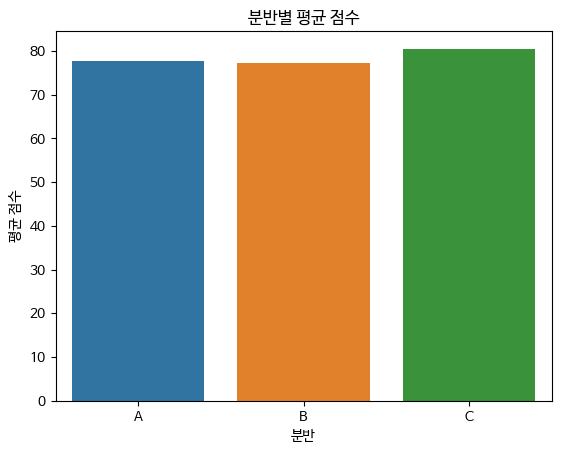

In [ ]:
#각 '분반'의 평균'점수'를 막대 그래프로 시각화 하세요.
sns.barplot(x='분반', y='점수', data=df_mean_score, hue='분반')
plt.xlabel('분반')
plt.ylabel('평균 점수')
plt.title('분반별 평균 점수')
plt.show()

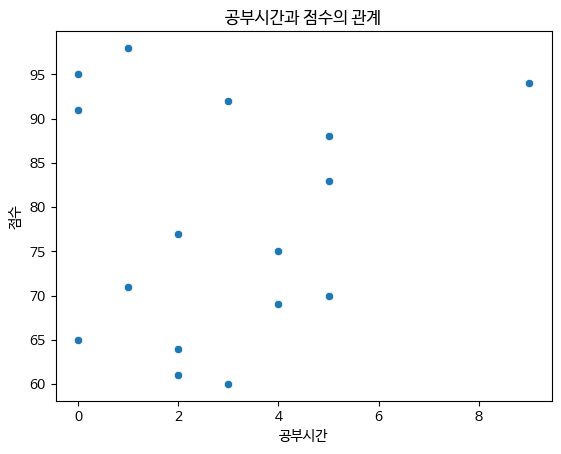

In [ ]:
#공부시간과 점수의 산점도 그래프를 그리세요
sns.scatterplot(x='공부시간', y='점수', data=df_cleaned)
plt.xlabel('공부시간')
plt.ylabel('점수')
plt.title('공부시간과 점수의 관계')
plt.show()